|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></h1>|
|-|:-:|
|<h2>Part 1:</h2>|<h1>Tokenizations and embeddings<h1>|
|<h2>Section:</h2>|<h1>Embedding spaces<h1>|
|<h2>Lecture:</h2>|<h1><b>CodeChallenge HELPER: Wikipedia vs. Twitter embeddings<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# svg figure format
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Exercise 1: Download and inspect the models

In [2]:
# NOTE: If you get errors importing, run the following !pip... line,
# then restart your session (from Runtime menu) and comment out the pip line.
# !pip install gensim

import gensim.downloader as api

# download the wikipedia and twitter models
wiki = api.load('glove-wiki-gigaword-50')
twit = api.load('glove-twitter-50')

[=====---------------------------------------------] 11.7% 23.4/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.6% 55.1/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.7% 87.2/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.4% 114.6/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 98.0% 195.4/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
dir(twit)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 

In [4]:
# embedding matrix dimensions
print(f'Wikipedia model has {wiki.vectors.shape[0]:,} words and {wiki.vectors.shape[1]} embedding dimensions.')
print(f'Twitter model has {twit.vectors.shape[0]:,} words and {twit.vectors.shape[1]} embedding dimensions.')

Wikipedia model has 400,000 words and 50 embedding dimensions.
Twitter model has 1,193,514 words and 50 embedding dimensions.


# Exercise 2: Visualize the embeddings for one word

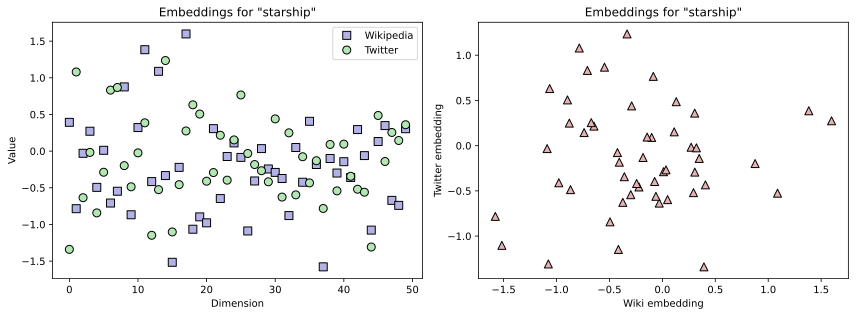

In [7]:
targetword = 'starship'

_,axs = plt.subplots(1,2,figsize=(12,4.5))
axs[0].plot(wiki[targetword],'ks',markerfacecolor=[.7,.7,.9],markersize=8,label='Wikipedia')
axs[0].plot(twit[targetword],'ko',markerfacecolor=[.7,.9,.7],markersize=8,label='Twitter')
axs[0].set(xlabel='Dimension',ylabel='Value',title=f'Embeddings for "{targetword}"')
axs[0].legend()

axs[1].plot(wiki[targetword],twit[targetword],'k^',markerfacecolor=[.9,.7,.7],markersize=8)
axs[1].set(xlabel='Wiki embedding',ylabel='Twitter embedding',title=f'Embeddings for "{targetword}"')

plt.tight_layout()
plt.show()

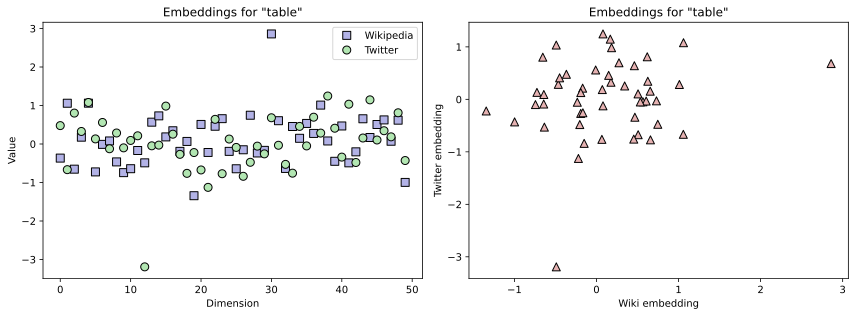

In [9]:
targetword = 'table'

_,axs = plt.subplots(1,2,figsize=(12,4.5))
axs[0].plot(wiki[targetword],'ks',markerfacecolor=[.7,.7,.9],markersize=8,label='Wikipedia')
axs[0].plot(twit[targetword],'ko',markerfacecolor=[.7,.9,.7],markersize=8,label='Twitter')
axs[0].set(xlabel='Dimension',ylabel='Value',title=f'Embeddings for "{targetword}"')
axs[0].legend()

axs[1].plot(wiki[targetword],twit[targetword],'k^',markerfacecolor=[.9,.7,.7],markersize=8)
axs[1].set(xlabel='Wiki embedding',ylabel='Twitter embedding',title=f'Embeddings for "{targetword}"')

plt.tight_layout()
plt.show()

# Exercise 3: Embeddings for word pairs within each model

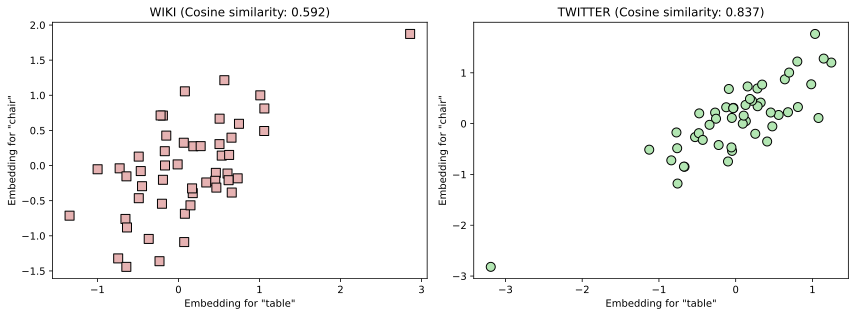

In [8]:
# word pair
word1 = 'table'
word2 = 'chair'

# scatter plot for wiki
_,axs = plt.subplots(1,2,figsize=(12,4.5))
axs[0].plot(wiki[word1],wiki[word2],'ks',markersize=9,markerfacecolor=[.9,.7,.7])
axs[0].set(xlabel=f'Embedding for "{word1}"',ylabel=f'Embedding for "{word2}"',
           title=f'WIKI (Cosine similarity: {wiki.similarity(word1,word2):.3f})')


# scatter plot for twitter
axs[1].plot(twit[word1],twit[word2],'ko',markersize=9,markerfacecolor=[.7,.9,.7])
axs[1].set(xlabel=f'Embedding for "{word1}"',ylabel=f'Embedding for "{word2}"',
           title=f'TWITTER (Cosine similarity: {twit.similarity(word1,word2):.3f})')

plt.tight_layout()
plt.show()

# Exercise 4: Similar words within each model

In [10]:
print('10 words most similar to "battery" in wiki:')
for w,cs in wiki.most_similar('battery'):
  print(f' {w:>15} with similarity {cs:.4f}')

print('\nAnd in twitter:')
for w,cs in twit.most_similar('battery'):
  print(f' {w:>15} with similarity {cs:.4f}')


10 words most similar to "battery" in wiki:
       batteries with similarity 0.8322
    rechargeable with similarity 0.7258
     lithium-ion with similarity 0.7083
          weapon with similarity 0.6928
         machine with similarity 0.6788
       lead-acid with similarity 0.6765
          device with similarity 0.6706
   anti-aircraft with similarity 0.6586
             gun with similarity 0.6580
        electric with similarity 0.6577

And in twitter:
         charger with similarity 0.8721
            cell with similarity 0.8216
       batteries with similarity 0.8167
          laptop with similarity 0.8139
            batt with similarity 0.8043
        charging with similarity 0.7881
     replacement with similarity 0.7854
         adapter with similarity 0.7587
           phone with similarity 0.7572
          charge with similarity 0.7499


# Exercise 5: foxes and dogs

In [12]:
text = 'The quick brown fox jumps over the lazy dog'

import re
words = re.split('\\s',text)#.lower())

# index sequence in the two embeddings
wiki_idx = [wiki.key_to_index[w] if w in wiki.key_to_index else np.inf for w in words ]
twit_idx = [twit.key_to_index[w] if w in twit.key_to_index else np.inf for w in words ]

print(' Word |  Wiki | Twitter')
print('-'*23)
for o,w,t in zip(words,wiki_idx,twit_idx):
  print(f'{o:>5} | {w:>5} | {t:>5}')

 Word |  Wiki | Twitter
-----------------------
  The |   inf |   inf
quick |  2582 |  2156
brown |  1042 |  1871
  fox |  2106 |  4000
jumps | 11070 | 18014
 over |    74 |   254
  the |     0 |    13
 lazy | 16531 |  2222
  dog |  2926 |  1317


In [15]:
text = 'The quick brown fox jumps over the lazy dog'

import re
words = re.split('\\s',text.lower())

# index sequence in the two embeddings
wiki_idx = [wiki.key_to_index[w] if w in wiki.key_to_index else np.inf for w in words ]
twit_idx = [twit.key_to_index[w] if w in twit.key_to_index else np.inf for w in words ]

print(' Word |  Wiki | Twitter')
print('-'*23)
for o,w,t in zip(words,wiki_idx,twit_idx):
  print(f'{o:>5} | {w:>5} | {t:>5}')

 Word |  Wiki | Twitter
-----------------------
  the |     0 |    13
quick |  2582 |  2156
brown |  1042 |  1871
  fox |  2106 |  4000
jumps | 11070 | 18014
 over |    74 |   254
  the |     0 |    13
 lazy | 16531 |  2222
  dog |  2926 |  1317


The Fact that these data points are all not on the diagonal indicates that the relationship between word pairs as measured through cosine similarities through data points are not the same in the two models

RSA = Representational Similarity Analysis

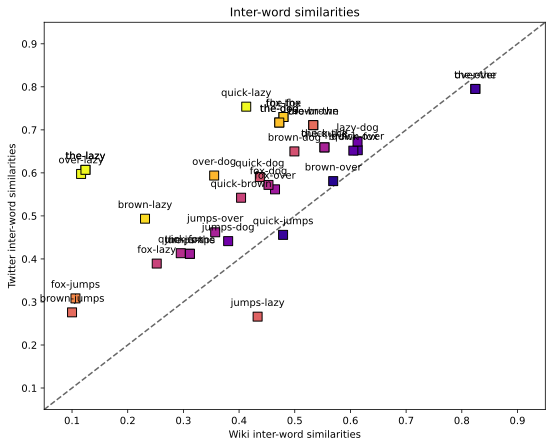

In [17]:
# get all unique inter-word similarities

plt.figure(figsize=(9,7))

# start range at 0 or 1?
for i in range(0,len(words)):
  for j in range(i+1,len(words)):

    # skip identity
    if words[i]==words[j]: continue

    # calculate the cosine similarities for the two embeddings
    cs_wiki = wiki.similarity(wiki_idx[i],wiki_idx[j])
    cs_twit = twit.similarity(twit_idx[i],twit_idx[j])

    # calculate the distance to the unity line
    v = np.array([cs_wiki,cs_twit])
    u = np.array([1,1])
    dist = np.linalg.norm(v - (sum(v*u))/(np.linalg.norm(u)**2)*u)

    # draw the results at the coordinates
    plt.plot(cs_wiki,cs_twit,'ks',markersize=9,markerfacecolor=mpl.cm.plasma(dist*5))

    # and write the word pair
    plt.text(cs_wiki,cs_twit+.02,f'{words[i]}-{words[j]}',va='bottom',ha='center')



# plot the unity line
xylims = [.05,.95]
plt.plot(xylims,xylims,'--',color=[.4,.4,.4],zorder=-30)

# final adjustments
plt.gca().set(xlim=xylims,ylim=xylims,xlabel='Wiki inter-word similarities',
              ylabel='Twitter inter-word similarities',title='Inter-word similarities')
plt.show()